In [1]:
%load_ext autoreload
%autoreload 2

In [2]:
import os
import sys
sys.path.append("../..")
sys.path.append("../../..")

In [3]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import networkx as nx

In [11]:
import networkx as nx
G = nx.Graph()


In [ ]:
path = "/data/pcpe_02.csv"
df = pd.read_csv(path, delimiter=';', decimal=',')

df['I-d'] = df['I-d'].apply(lambda x: '0' if pd.isna(x) else str(int(x)))
df['CPF_CNPJ_OD'] = df['CPF_CNPJ_OD'].apply(lambda x: 'MISSING' if pd.isna(x) else str(x))
df['NUMERO_CONTA'] = df['NUMERO_CONTA'].apply(lambda x: 'MISSING' if pd.isna(x) else str(x))
df.shape

In [ ]:
list_of_CPF_CNPJ_I_d = list(set(df.loc[df['I-d'] == '1', 'CPF_CNPJ_TITULAR'].to_list()))

print(list_of_CPF_CNPJ_I_d)

df = df[df['CPF_CNPJ_TITULAR'].isin(list_of_CPF_CNPJ_I_d)]
# df = df[df['CPF_CNPJ_OD'] != 'MISSING']
# print('MISSING' in set(df['CPF_CNPJ_OD'].to_list()))
# print(set(df['I-d'].to_list()))
df.shape

In [ ]:
df = df.values
df

In [ ]:
mp = {}
cont = 1
G.clear()
for x in df:
    if x[4] not in mp:
        if x[22] == '1':
            G.add_node(cont, account=x[4])
        else:
            G.add_node(cont, account=x[4])
        mp[x[4]] = cont
        cont+=1
    if x[21] not in mp and not np.isnan(x[21]):
        G.add_node(cont)
        mp[x[21]] = cont
        cont+=1

    if x[4] in mp and x[21] in mp:
        if x[22] == '1':
            G.add_edge(mp[x[4]], mp[x[21]], weight=1, i_d=True)
        else:
            G.add_edge(mp[x[4]], mp[x[21]], weight=1, i_d=False)

print(len(G))
print(G.number_of_edges())
   

In [116]:
nx.write_graphml(G, "grafo.graphml")

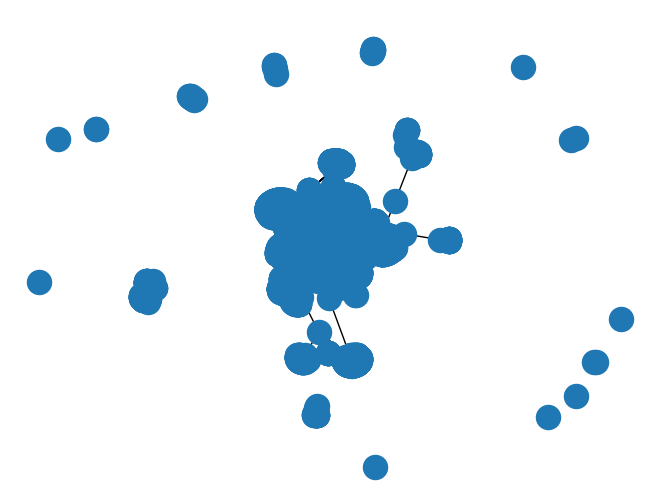

In [117]:
nx.draw_spring(G)

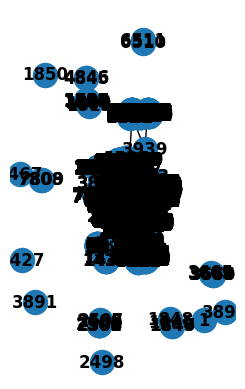

In [118]:
subax1 = plt.subplot(121)
nx.draw(G, with_labels=True, font_weight='bold')